In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [65]:
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [66]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [67]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Number of Outcome for each 0 and 1 are:
 0    500
1    268
Name: Outcome, dtype: int64


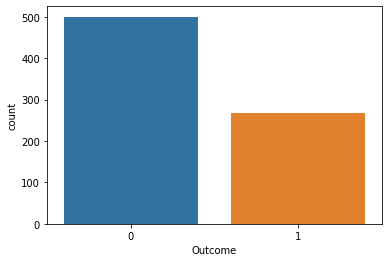

In [68]:
sns.countplot(x='Outcome',data=df)
print('Number of Outcome for each 0 and 1 are:\n',df['Outcome'].value_counts())

We can clearly see that there is class imbalance in the dataset. We have 500 rows for 0/No diabetes whereas only 268 rows for 1/Diabetes.

<AxesSubplot:>

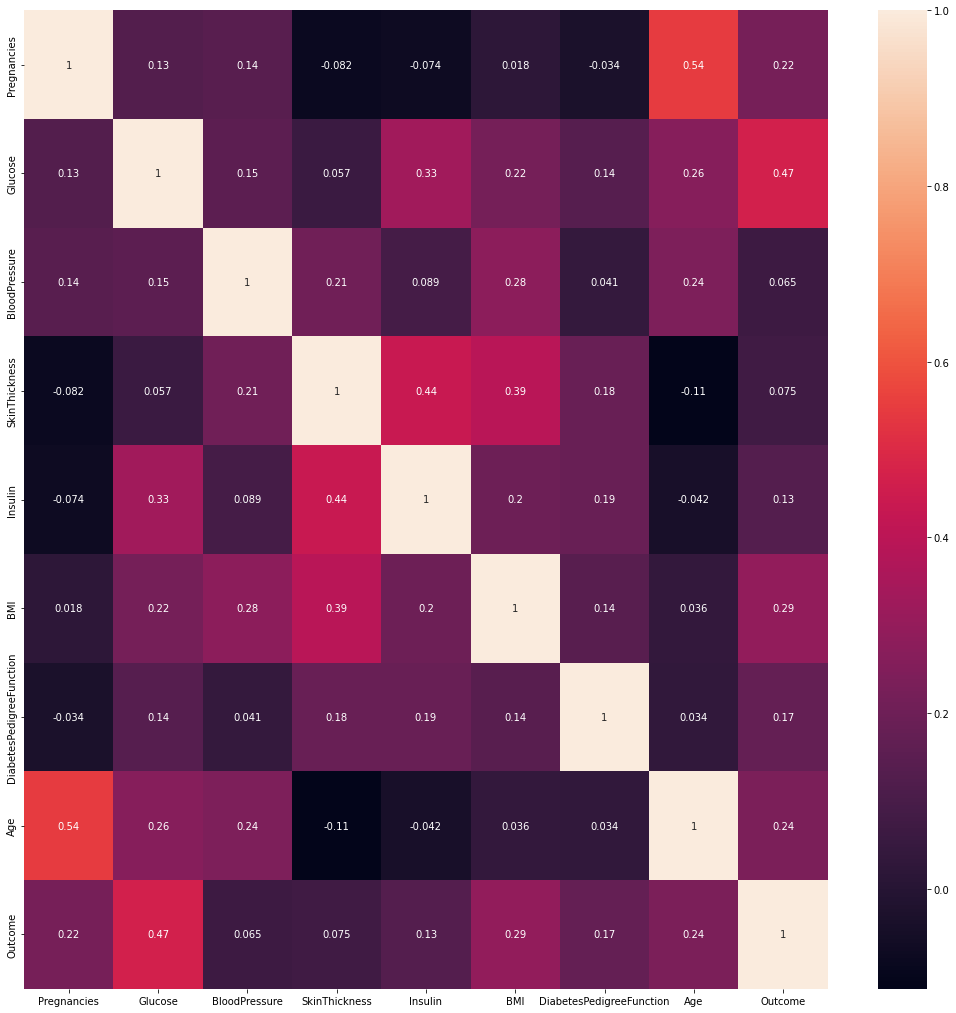

In [69]:
plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(), annot=True)

There is no collinearity as such among the variables as seen from the above heatmap.

As most of the variables are on different scale, it would be prudent to standardize the data in order to bring all of them to the same scale. Then we'll visualize using swarm plots to understand which of these variables are better in classifying.

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = pd.DataFrame(scaler.fit_transform(df.drop(['Outcome'], axis=1)))
df1.columns = df.drop(['Outcome'], axis=1).columns

In [71]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 79.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 51.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 61.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 68.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 67.8% of the points cannot be placed; y

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Pregnancies'),
  Text(1, 0, 'Glucose'),
  Text(2, 0, 'BloodPressure'),
  Text(3, 0, 'SkinThickness'),
  Text(4, 0, 'Insulin'),
  Text(5, 0, 'BMI'),
  Text(6, 0, 'DiabetesPedigreeFunction'),
  Text(7, 0, 'Age')])

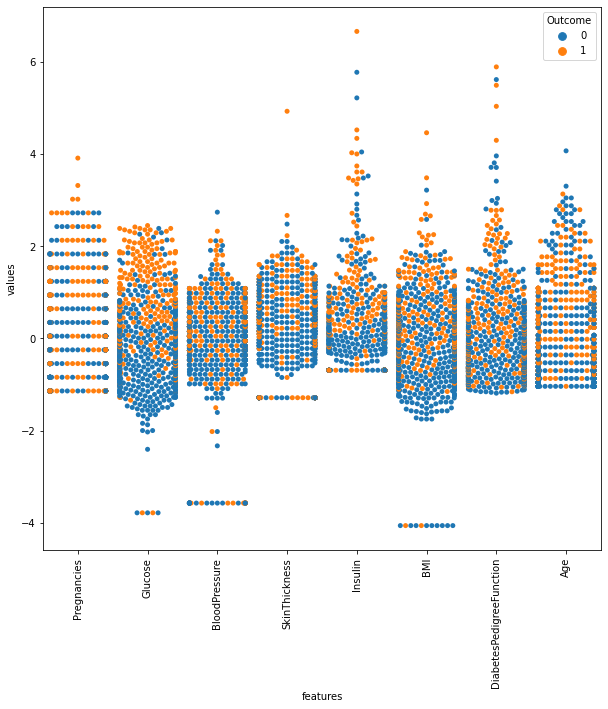

In [72]:
plt.figure(figsize=(10,10))
data = pd.concat([df['Outcome'], df1.iloc[:,0:10]], axis=1)
data = pd.melt(data, id_vars='Outcome',var_name='features',value_name='values')
sns.swarmplot(x='features',y='values',hue='Outcome',data=data)
plt.xticks(rotation=90)

As observed from the swarm plots, we can see no particular feature is giving a clear picture of separation or classification. We can now try running the ML models by extracting the best features for highest accuracy. We'll use RFE to extract the features for our use.

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1,df['Outcome'],test_size=0.2)

In [81]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [85]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=clf, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(X_train,y_train)

In [86]:
print('Optimal number of features : ', rfecv.n_features_)
print('Optimal number of features : ', X_train.columns[rfecv.support_])

Optimal number of features :  5
Optimal number of features :  Index(['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')


Accuracy is : 0.7922077922077922


<AxesSubplot:>

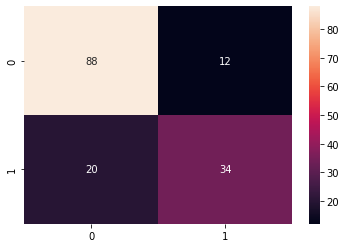

In [87]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
acs = accuracy_score(y_test,rfecv.predict(X_test))
print('Accuracy is :' , acs)
cm= confusion_matrix(y_test, rfecv.predict(X_test))
sns.heatmap(cm, annot=True)